In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
df = pd.read_csv(r'C:\Users\ashley.njoroge\OneDrive - Aga Khan University\Desktop\DATA, 2025\All_merged.csv', encoding='latin1')

C:\Users\ashley.njoroge\AppData\Local\Temp\ipykernel_22440\2004603841.py:2: DtypeWarning: Columns (8,21,32,65,66,67,69,70,71,73,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ashley.njoroge\OneDrive - Aga Khan University\Desktop\DATA, 2025\All_merged.csv', encoding='latin1')


In [4]:
#display the first few columns
df.head()

,Unnamed: 0,permid,chu_name.x,hhid,chvid,villageid,hhno.x,dob.x,age_ear,sex.x,...,smalnaur,modmalna,llin,kchronici,cough,hivstatus,disability,others,round,event
0,1,1180102,Kibwabwani,1-Jan,18,1,1,23-Dec-73,48,F,...,NaN,NaN,Y,NaN,N,Y,NaN,NaN,R10,Resident
1,2,1180202,Kibwabwani,1-Feb,18,1,2,5-Mar-87,34,F,...,NaN,NaN,Y,NaN,N,Y,NaN,NaN,R10,Resident
2,3,1180302,Kibwabwani,1-Mar,18,1,3,12-Jan-81,40,F,...,NaN,NaN,Y,NaN,N,Y,NaN,NaN,R10,Resident
3,4,1180402,Kibwabwani,1-Apr,18,1,4,23-Apr-61,60,F,...,NaN,NaN,Y,NaN,N,Y,NaN,NaN,R10,Resident
4,5,1180502,Kibwabwani,1-May,18,1,5,6-May-70,51,F,...,NaN,NaN,Y,NaN,N,Y,NaN,NaN,R10,Resident


In [5]:
df.shape

(19054, 86)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19054 entries, 0 to 19053
Data columns (total 86 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19054 non-null  int64  
 1   permid      19054 non-null  int64  
 2   chu_name.x  19054 non-null  object 
 3   hhid        19054 non-null  object 
 4   chvid       19054 non-null  int64  
 5   villageid   19054 non-null  int64  
 6   hhno.x      19054 non-null  int64  
 7   dob.x       18492 non-null  object 
 8   age_ear     19054 non-null  object 
 9   sex.x       19053 non-null  object 
 10  phq1        19054 non-null  int64  
 11  phq2        19054 non-null  int64  
 12  phq3        19054 non-null  int64  
 13  phq4        19054 non-null  int64  
 14  phq5        19054 non-null  int64  
 15  phq6        19054 non-null  int64  
 16  phq7        19054 non-null  int64  
 17  phq8        19054 non-null  int64  
 18  phq9        19054 non-null  int64  
 19  score       19054 non-nul

DEMOGRAPHICS

In [7]:
def count_and_percent(series):
    counts = series.value_counts(dropna=False)
    percentages = series.value_counts(normalize=True, dropna=False) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})


In [8]:
# Clean and map gender
df['sex.x'] = df['sex.x'].str.strip().map({'M': 'Male', 'F': 'Female'})

# Gender breakdown
gender_summary = count_and_percent(df['sex.x'])
print(gender_summary)



        Count  Percentage
sex.x                    
Female  14812       77.74
Male     4241       22.26
NaN         1        0.01


Female participants(77.4%) are significantly more than male participants(22.26%).

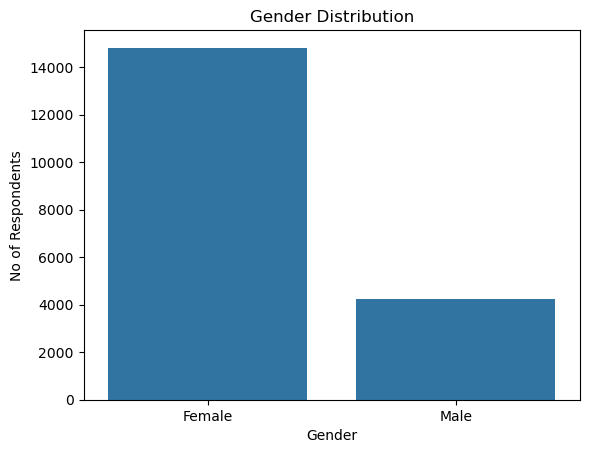

In [9]:
# plotting the gender distribution 
sns.countplot(x='sex.x', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("No of Respondents")
plt.show()

In [11]:
# Converting age to numeric
df['age_ear'] = pd.to_numeric(df['age_ear'], errors='coerce')

# Dropping invalid ages (e.g., below 0 or over 120)
df = df[(df['age_ear'] >= 0) & (df['age_ear'] <= 120)]


In [12]:
# Creating age bins
df['age_ear'] = pd.cut(
    df['age_ear'],
    bins=[0, 17, 35, 50, 65, 120],
    labels=['<18', '18–35', '36–50', '51–65', '65+']
)

In [13]:
def count_and_percent(series):
    counts = series.value_counts(dropna=False)
    percentages = series.value_counts(normalize=True, dropna=False) * 100
    return pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})

age_summary = count_and_percent(df['age_ear'])
print(age_summary)


         Count  Percentage
age_ear                   
18–35     7455       39.13
36–50     5705       29.95
51–65     3639       19.10
65+       2032       10.67
<18        169        0.89
NaN         51        0.27


The dataset largely consists of participants who are between 18 and 35 who make up about 68%, Older participants from 50 to 65+ make up about 30% combined. Minors(<18) are very few making up 0.89% and a negligible number of entries are missing age data.

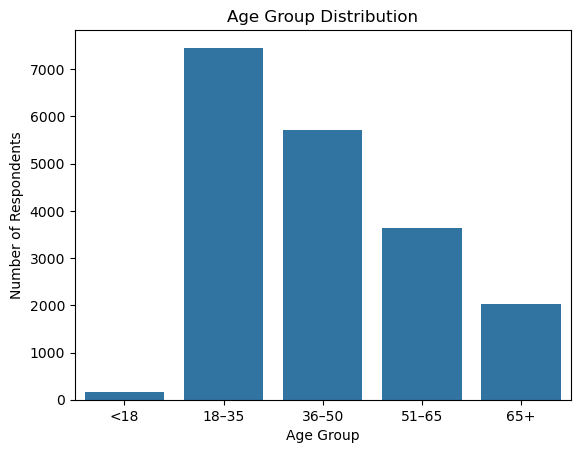

In [14]:
sns.countplot(x='age_ear', data=df, order=['<18', '18–35', '36–50', '51–65', '65+'])
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.show()


In [15]:
chu_summary = count_and_percent(df['chu_name.x'])
print(chu_summary)  


             Count  Percentage
chu_name.x                    
Vishakani     3575       18.77
Buni          2860       15.01
Mutsengo      2421       12.71
Mwele         2028       10.65
Tsangatsini   1885        9.89
Kombeni       1809        9.50
Kibwabwani    1558        8.18
Mnazimwenga   1024        5.38
Kwale          957        5.02
Viragoni       934        4.90


The data spans 10 CHUs with Vishakani, Buni, Mutsengo making up nearly half of the total responses.

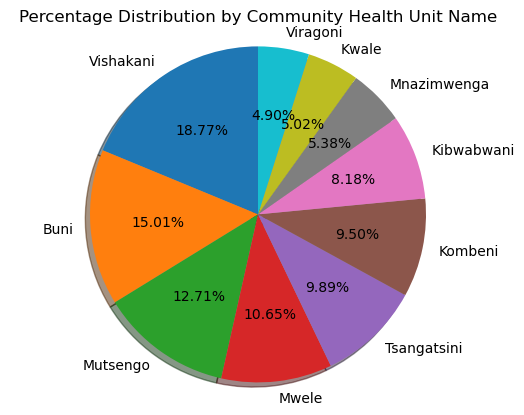

In [35]:
labels = ['Vishakani', 'Buni', 'Mutsengo', 'Mwele', 'Tsangatsini', 'Kombeni', 'Kibwabwani', 'Mnazimwenga', 'Kwale', 'Viragoni']
sizes = [18.77, 15.01, 12.71, 10.65, 9.89, 9.50, 8.18, 5.38, 5.02, 4.90]

# Creating pie chart
plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)

plt.axis('equal')  # Keep the pie chart circular
plt.title('Percentage Distribution by Community Health Unit Name')

plt.show()

PHQ-9 -- MENTAL HEALTH

In [17]:
# no of responses per question
question_texts = {
    'phq1': "1. Little interest or pleasure in doing things",
    'phq2': "2. Feeling down, depressed, or hopeless",
    'phq3': "3. Trouble falling or staying asleep, or sleeping too much",
    'phq4': "4. Feeling tired or having little energy",
    'phq5': "5. Poor appetite or overeating",
    'phq6': "6. Feeling bad about yourself — or that you are a failure or have let yourself or your family down",
    'phq7': "7. Trouble concentrating on things, such as reading the newspaper or watching television",
    'phq8': "8. Moving or speaking so slowly that other people could have noticed? Or the opposite — being so fidgety or restless that you have been moving around a lot more than usual",
    'phq9': "9. Thoughts that you would be better off dead or of hurting yourself in some way"
}
summary_table = pd.DataFrame()
for col, question in question_texts.items():
    counts = df[col].value_counts().sort_index()
    row = pd.Series(counts, name=question)
    summary_table = pd.concat([summary_table, row], axis=1)

# Transpose so questions are rows and responses are columns
summary_table = summary_table.T.fillna(0).astype(int)

# Rename columns
summary_table.columns = ['Not at all', 'Several days', 'More than half the days', 'Nearly every day']

summary_table.reset_index(inplace=True)
summary_table.rename(columns={'index': 'Question'}, inplace=True)

print(summary_table)

                                            Question  Not at all  \
0     1. Little interest or pleasure in doing things        9378   
1            2. Feeling down, depressed, or hopeless        8339   
2  3. Trouble falling or staying asleep, or sleep...        8765   
3           4. Feeling tired or having little energy        5376   
4                     5. Poor appetite or overeating        9243   
5  6. Feeling bad about yourself — or that you ar...       10559   
6  7. Trouble concentrating on things, such as re...       12454   
7  8. Moving or speaking so slowly that other peo...       11831   
8  9. Thoughts that you would be better off dead ...       13654   

   Several days  More than half the days  Nearly every day  
0          8642                      625               406  
1          8952                     1038               722  
2          8452                     1028               806  
3         10993                     1248              1434  
4          809

Majority of the responded chose "Not at all" for most PHQ-9 questions, suggesting generally low symptom reporting across the population. However, some items for example feeling tired or low energy, feeling down had higher frequencies of reported distress, with over 10,000 respondents selecting “Several days” or worse.

C:\Users\ashley.njoroge\AppData\Local\Temp\ipykernel_22440\3851570333.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_sorted, x="Reported (≥ Several Days)", y="Question", palette="magma")


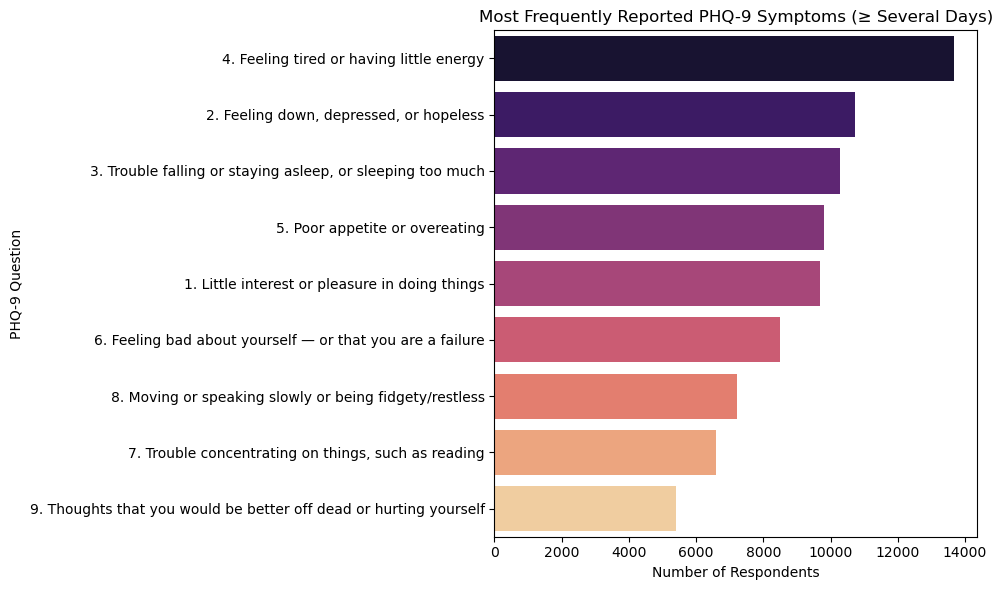

In [24]:
# highlighting which PHQ-9 items are most frequently reported by focusing on the more severe responses:
summary_df = pd.DataFrame({
    "Question": [
        "1. Little interest or pleasure in doing things",
        "2. Feeling down, depressed, or hopeless",
        "3. Trouble falling or staying asleep, or sleeping too much",
        "4. Feeling tired or having little energy",
        "5. Poor appetite or overeating",
        "6. Feeling bad about yourself — or that you are a failure",
        "7. Trouble concentrating on things, such as reading",
        "8. Moving or speaking slowly or being fidgety/restless",
        "9. Thoughts that you would be better off dead or hurting yourself"
    ],
    "Not at all": [9378, 8339, 8765, 5376, 9243, 10559, 12454, 11831, 13654],
    "Several days": [8642, 8952, 8452, 10993, 8090, 6846, 5331, 5887, 4491],
    "More than half the days": [625, 1038, 1028, 1248, 1130, 996, 844, 834, 557],
    "Nearly every day": [406, 722, 806, 1434, 588, 650, 422, 499, 349]
})
summary_df["Reported (≥ Several Days)"] = (
    summary_df["Several days"] +
    summary_df["More than half the days"] +
    summary_df["Nearly every day"]
)
# Sort by highest reported symptoms
summary_sorted = summary_df.sort_values(by="Reported (≥ Several Days)", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=summary_sorted, x="Reported (≥ Several Days)", y="Question", palette="magma")
plt.title("Most Frequently Reported PHQ-9 Symptoms (≥ Several Days)")
plt.xlabel("Number of Respondents")
plt.ylabel("PHQ-9 Question")
plt.tight_layout()
plt.show()


Among all PHQ-9 items, the most frequently reported symptom was: Feeling tired or having little energy (Q4) — experienced by 13,675 respondents.
Other common symptoms included: Feeling depressed or hopeless (Q2) — 11,712 and Sleep difficulties (Q3) — 11,286
The least reported symptom was suicidal thoughts (Q9) — but still appeared in 5,397 respondents, indicating a significant public health concern despite lower frequency.

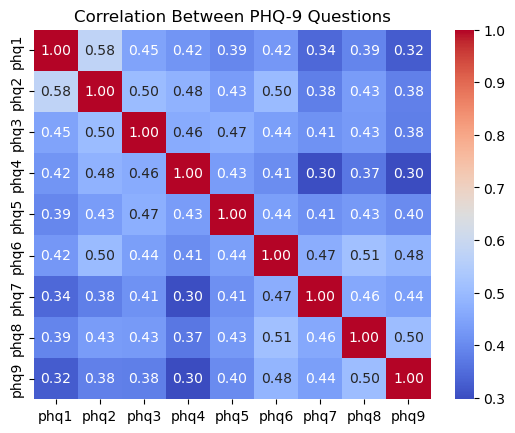

In [25]:
# Calculate correlation matrix
corr_matrix = df[list(question_texts.keys())].corr()
# heatmap 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between PHQ-9 Questions")
plt.show()


The PHQ-9 correlation matrix shows moderate positive relationships between most items (ranging 0.3–0.5), indicating good internal consistency of the scale. Stronger correlations were observed between: Feeling like a failure (phq6) and psychomotor changes (phq8): r = 0.51, Suicidal thoughts (phq9) and psychomotor changes (phq8): r = 0.50.
These suggest possible symptom clusters associated with severe depression. Meanwhile, some weaker correlations (e.g., tiredness and concentration) highlight the multifaceted nature of depressive experiences.

In [26]:
def phq_category(score):
    if score <= 4:
        return 'None/minimal'
    elif score <= 9:
        return 'Mild'
    elif score <= 14:
        return 'Moderate'
    elif score <= 19:
        return 'Moderately severe'
    else:
        return 'Severe'

df['phq_category'] = df['score'].apply(phq_category)

In [27]:
df['phq_category'].value_counts(normalize=True).round(2) * 100

phq_category
None/minimal         48.0
Mild                 37.0
Moderate             11.0
Moderately severe     3.0
Severe                1.0
Name: proportion, dtype: float64

PHQ-9 category distribution shows that 85% of respondents fall into “None” or “Mild” depression, suggesting generally good mental health status. However, 15% exhibit moderate to severe symptoms, with 1% in the highest severity category — indicating a meaningful mental health burden that warrants further analysis in relation to climate exposure and infrastructure risk.

<Axes: xlabel='phq_category', ylabel='count'>

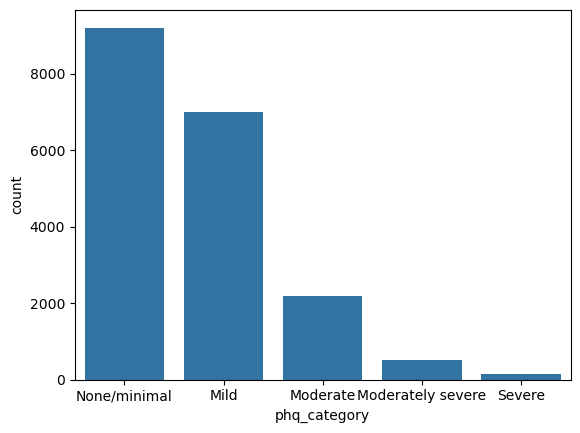

In [28]:
sns.countplot(x='phq_category', data=df, order=['None/minimal', 'Mild', 'Moderate', 'Moderately severe', 'Severe'])


In [29]:
print("Mean PHQ-9 Scores by Gender \n", df.groupby('sex.x')['score'].mean())


Mean PHQ-9 Scores by Gender 
 sex.x
Female    5.326379
Male      5.430290
Name: score, dtype: float64


Mean PHQ-9 scores are very similar between male and female respondents: 5.43 for males and 5.33 for females. This suggests no substantial gender-based difference in average depression symptoms.

In [40]:
df['sex_label'] = df['sex.x']  
pd.crosstab(df['sex_label'], df['phq_category'], normalize='index') * 100

phq_category,Mild,Moderate,Moderately severe,None/minimal,Severe
sex_label,,,,,
Female,36.533657,11.673756,2.700695,48.443724,0.648167
Male,37.673980,10.568530,2.689314,48.030196,1.037981


While the overall PHQ-9 category distributions are similar between males and females, some subtle differences are visible:
- A slightly higher proportion of men report mild and severe symptoms, while
- Women report moderate symptoms more frequently.
  
The percentage of respondents with moderately severe symptoms is nearly identical, and about 48% of each gender falls into the "None/minimal" category.
These findings suggest that although mean scores by gender are similar, the shape of severity distribution may differ, which could have implications for how mental health interventions are tailored by gender.

In [43]:
df['age_group'] = df['age_ear']  
phq_by_age = df.groupby('age_group')['score'].mean().round(2)
print(phq_by_age)


age_group
<18      5.31
18–35    4.91
36–50    5.35
51–65    5.74
65+      6.21
Name: score, dtype: float64


C:\Users\ashley.njoroge\AppData\Local\Temp\ipykernel_22440\3183192125.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  phq_by_age = df.groupby('age_group')['score'].mean().round(2)


Mean PHQ-9 scores appear to increase steadily with age, starting from 4.91 in the 18–25 group and reaching 6.21 among adults 65 and older. This trend suggests that older respondents may experience greater psychological distress, potentially due to factors like declining health, or social isolation. While the <18 group also shows a moderately high score (5.31), the small sample size may limit generalizability.

C:\Users\ashley.njoroge\AppData\Local\Temp\ipykernel_22440\152508592.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(phq_by_age.keys()), y=list(phq_by_age.values()), palette='crest')


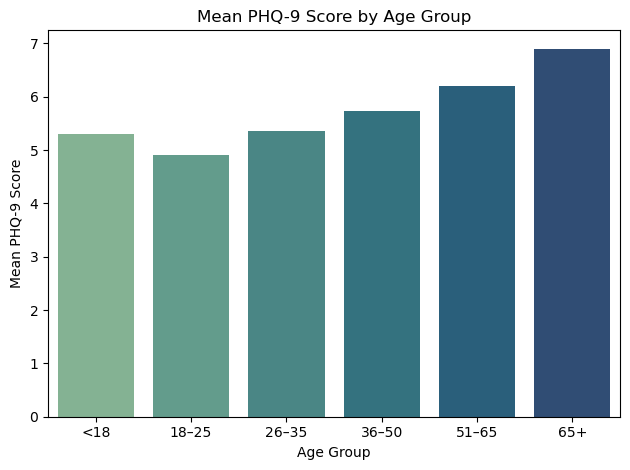

In [44]:
# bar plot 
phq_by_age = {
    '<18': 5.31,
    '18–25': 4.91,
    '26–35': 5.35,
    '36–50': 5.74,
    '51–65': 6.21,
    '65+': 6.90
}

sns.barplot(x=list(phq_by_age.keys()), y=list(phq_by_age.values()), palette='crest')
plt.title("Mean PHQ-9 Score by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean PHQ-9 Score")
plt.tight_layout()
plt.show()

In [45]:
print("Mean PHQ-9 score by CHU \n", df.groupby('chu_name.x')['score'].mean())

Mean PHQ-9 score by CHU 
 chu_name.x
Buni           3.567832
Kibwabwani     6.487805
Kombeni        9.435047
Kwale          5.459770
Mnazimwenga    5.789062
Mutsengo       4.750516
Mwele          1.380671
Tsangatsini    6.743236
Viragoni       5.547109
Vishakani      5.926154
Name: score, dtype: float64


The average PHQ-9 score varies significantly across Community Health Units (CHUs). Kombeni (9.44) and Tsangatsini (6.74) had the highest mean scores, suggesting elevated mental health burden in these regions. In contrast, Mwele (1.38) and Buni (3.57) reported notably lower scores. This spatial variation could reflect differences in infrastructure, environmental conditions, or access to services.

C:\Users\ashley.njoroge\AppData\Local\Temp\ipykernel_22440\3076125478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phq_by_chu.values, y=phq_by_chu.index, palette='flare')


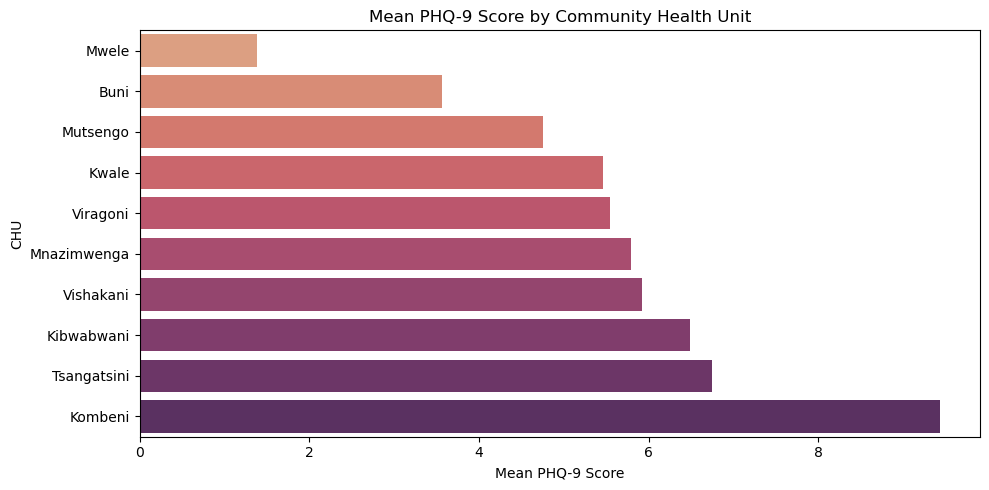

In [46]:
phq_by_chu = df.groupby('chu_name.x')['score'].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=phq_by_chu.values, y=phq_by_chu.index, palette='flare')
plt.xlabel("Mean PHQ-9 Score")
plt.ylabel("CHU")
plt.title("Mean PHQ-9 Score by Community Health Unit")
plt.tight_layout()
plt.show()

CLIMATE EXPOSURE

In [52]:
# climate change that has been noticed by participants 
from collections import Counter

# Mapping
climate1_map = {
    '1': "None",
    '2': "Rain comes at different time",
    '3': "Less rain than before",
    '4': "More rain than before",
    '5': "Hotter temperatures",
    '6': "More very hot days"
}

# Cleaning and splitting multi-select responses
climate1_split = df['climate1'].dropna().astype(str).apply(lambda x: x.strip().split())

# Flattening and mapping to labels
flat_codes = [code for row in climate1_split for code in row]
flat_labels = [climate1_map.get(str(code), f"Unknown ({code})") for code in flat_codes]

# Counting responses
counts = Counter(flat_labels)
total_respondents = len(df)

# Creating DataFrame summary
climate1_summary = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])
climate1_summary['Percentage'] = (climate1_summary['Count'] / total_respondents * 100).round(2)
climate1_summary = climate1_summary.sort_values(by='Count', ascending=False)
print("\t Climate Change Noticed: \n", climate1_summary)


	 Climate Change Noticed: 
                               Count  Percentage
Rain comes at different time  10414       54.66
Less rain than before          8321       43.68
Hotter temperatures            5851       30.71
More very hot days             5348       28.07
None                           1363        7.15
More rain than before           275        1.44
Unknown (0)                       6        0.03


Over 90% of respondents noticed at least one form of climate change, with the most common being that “the rain comes at a different time” (54.7%), followed by “less rain than before” (43.7%) and “hotter temperatures” (30.7%).

In [54]:
climate1_clean = df[['sex_label', 'climate1']].dropna().copy()
climate1_clean['climate_codes'] = climate1_clean['climate1'].astype(str).apply(lambda x: x.strip().split())
climate1_exploded = climate1_clean.explode('climate_codes')
climate1_exploded['climate_label'] = climate1_exploded['climate_codes'].map(climate1_map)
pd.crosstab(
    climate1_exploded['sex_label'],
    climate1_exploded['climate_label'],
    normalize='index'
) * 100



climate_label,Hotter temperatures,Less rain than before,More rain than before,More very hot days,None,Rain comes at different time
sex_label,,,,,,
Female,18.420413,26.711219,0.911300,16.857027,3.969218,33.130822
Male,18.936201,25.069031,0.726639,17.235867,5.566051,32.466211


Perceptions of climate change were broadly similar between genders, with only subtle differences. 

In [58]:
climate1_clean = df[['age_group', 'climate1']].dropna().copy()
climate1_clean['climate_codes'] = climate1_clean['climate1'].astype(str).apply(lambda x: x.strip().split())
climate1_exploded = climate1_clean.explode('climate_codes')
climate1_exploded['climate_label'] = climate1_exploded['climate_codes'].map(climate1_map)
pd.crosstab(
    climate1_exploded['age_group'],
    climate1_exploded['climate_label'],
    normalize='index'
) * 100



climate_label,Hotter temperatures,Less rain than before,More rain than before,More very hot days,None,Rain comes at different time
age_group,,,,,,
<18,17.228464,27.340824,1.872659,13.483146,10.486891,29.588015
18–35,18.064408,26.325059,0.888963,16.269708,4.419658,34.032204
36–50,19.250285,26.447137,0.807704,17.541680,3.976390,31.976804
51–65,18.889238,26.482586,0.862880,17.634139,3.906495,32.224663
65+,17.020631,26.183252,0.940534,16.777913,4.793689,34.283981


In [59]:
# most severe shocks experienced
climate3_map = {
    101: "Drought", 1101: "Irregular rains", 102: "Floods", 1102: "Landslides", 103: "Earthquakes",
    104: "Unusually high level of crop pests or disease", 105: "Unusually high level of livestock pests or disease",
    106: "Unusually low prices for agricultural inputs", 107: "Unusually high costs of agricultural inputs",
    108: "Unusually high prices for food", 121: "Other"
}

# Combine all 3 columns
shocks_all = pd.concat([df['climate3a'], df['climate3b'], df['climate3c']])
shock_labels = shocks_all.map(climate3_map)

shock_summary = shock_labels.value_counts().to_frame(name='Count')
shock_summary['Percentage'] = (shock_summary['Count'] / len(df) * 100).round(2)
print(shock_summary)


                                                    Count  Percentage
Unusually high prices for food                      19198      100.77
Drought                                             17654       92.67
Irregular rains                                      8801       46.20
Unusually high level of crop pests or disease        3877       20.35
Unusually high costs of agricultural inputs          3639       19.10
Unusually high level of livestock pests or disease   2541       13.34
Unusually low prices for agricultural inputs          719        3.77
Other                                                 678        3.56
Floods                                                 16        0.08
Earthquakes                                             7        0.04
Landslides                                              5        0.03


Nearly all respondents (93%) experienced drought, and 100% reported high food prices, making these the most severe and widespread climate shocks. Other significant stressors included irregular rains (46%), crop pests (20%), and high agricultural costs (19%). These conditions likely contribute to livelihood instability and psychological distress. Less frequent shocks like floods or earthquakes were reported in <1% of cases, suggesting limited geographic spread.

In [63]:
# who suffers most from heat 
from collections import Counter

# Mapping
climate5_map = {
    '1': "Elderly",
    '2': "Pregnant women",
    '3': "Men in fields",
    '4': "Women carrying water",
    '5': "Newborns",
    '6': "School children",
    '7': "Other"
}

# Splitting and cleaning the responses
climate5_split = df['climate5'].dropna().astype(str).apply(lambda x: x.strip().split())

# Flattening and mapping
flat_codes = [code for row in climate5_split for code in row]
flat_labels = [climate5_map.get(code.strip(), f"Unknown ({code})") for code in flat_codes]

# Counting
counts = Counter(flat_labels)

# Creating summary table
climate5_summary = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])
climate5_summary['Percentage'] = (climate5_summary['Count'] / len(df) * 100).round(2)
climate5_summary = climate5_summary.sort_values(by='Count', ascending=False)

print(climate5_summary.head())


                      Count  Percentage
Pregnant women         5901       30.97
Newborns               5169       27.13
School children        2865       15.04
Elderly                2809       14.74
Women carrying water   2550       13.39


These findings suggest that vulnerable populations — especially pregnant women, infants, and children — are widely recognized as being most affected by high temperatures.

In [65]:
# most critical health risk from heat
climate6_map = {
    1: "Dehydration", 2: "Skin rash", 3: "Asthma or difficulty breathing", 4: "Pregnancy problems",
    5: "Violence or arguments", 6: "Death", 7: "Other"

}

df['climate6_label'] = df['climate6'].map(climate6_map)
df['climate6_label'].value_counts(dropna=False)


climate6_label
Skin rash                         10169
Dehydration                        6092
Asthma or difficulty breathing     1766
Pregnancy problems                  425
Other                               285
Violence or arguments               161
Death                               153
Name: count, dtype: int64

The results highlight that skin-related conditions and dehydration are perceived as the most pressing health risks during extreme heat, reflecting strong awareness of physical stress from high temperatures.

In [66]:
# are hot homes linked to higher PHQ-9 Scores?
climate4_map = {
    1: "Yes", 2: "No", 3: "Not sure"
}
df['climate4_label'] = df['climate4'].map(climate4_map)


C:\Users\ashley.njoroge\AppData\Local\Temp\ipykernel_22440\3545467908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='climate4_label', y='score', palette='coolwarm')


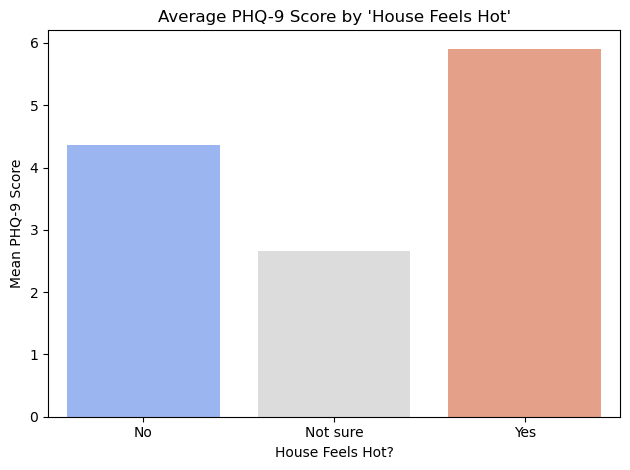

In [67]:
grouped = df.groupby('climate4_label')['score'].mean().reset_index()

sns.barplot(data=grouped, x='climate4_label', y='score', palette='coolwarm')
plt.title("Average PHQ-9 Score by 'Household Heat Perception'")
plt.ylabel("Mean PHQ-9 Score")
plt.xlabel("House Feels Hot?")
plt.tight_layout()
plt.show()


This pattern suggests that individuals who experience greater indoor heat may also report higher symptoms of depression. While this does not prove cause, it highlights a potential link between climate-related physical discomfort and mental health burden, warranting further investigation.

In [69]:
# PHQ-9 vs Climate shocks
shock_long = df[['score', 'climate3a', 'climate3b', 'climate3c']].melt(id_vars='score', 
                                                                       value_name='shock_code')


shock_long['shock_label'] = shock_long['shock_code'].map(climate3_map)
shock_long = shock_long.dropna(subset=['shock_label'])

shock_score_avg = shock_long.groupby('shock_label')['score'].mean().sort_values(ascending=False).round(2)

print("Average PHQ-9 Score by Climate Shock:\n")
print(shock_score_avg)



Average PHQ-9 Score by Climate Shock:

shock_label
Earthquakes                                           6.71
Other                                                 5.66
Drought                                               5.54
Unusually high level of livestock pests or disease    5.40
Unusually high prices for food                        5.38
Unusually high costs of agricultural inputs           5.30
Irregular rains                                       5.25
Unusually high level of crop pests or disease         4.91
Landslides                                            4.20
Unusually low prices for agricultural inputs          3.31
Floods                                                1.81
Name: score, dtype: float64


Respondents who experienced earthquakes, drought, or livestock-related shocks reported the highest average PHQ-9 scores, suggesting that sudden or economically disruptive climate shocks may be linked to more severe mental health symptoms compared to more localized or less damaging events like floods.

C:\Users\ashley.njoroge\AppData\Local\Temp\ipykernel_22440\545036677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shock_score_avg.values, y=shock_score_avg.index, palette='rocket')


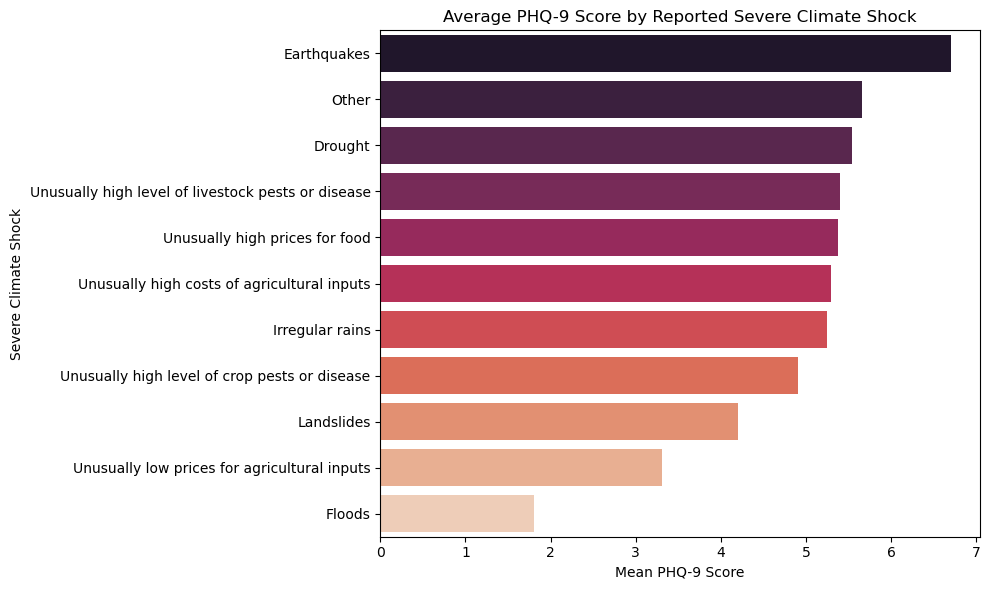

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x=shock_score_avg.values, y=shock_score_avg.index, palette='rocket')
plt.title("Average PHQ-9 Score by Reported Severe Climate Shock")
plt.xlabel("Mean PHQ-9 Score")
plt.ylabel("Severe Climate Shock")
plt.tight_layout()
plt.show()

INFRASTRUCTURE

In [77]:
# infrastructure variables
# Water source
water_map = {
    11: "Piped in Dwelling", 12: "Piped into Yard/Plot", 13: "Piped to Neighbour", 14: "Public Tap/Standpipe", 
    21: "Tube well or Borehole or Dug Well", 31: "Protected Well", 32: "Unprotected Well", 
    41: "Protected Spring", 42: "Unprotected Spring", 51: "Rainwater", 61: "Tanker Truck",
    71: "Cart with a small tank", 81: "Surface Water (River/dam/lake/pond/stream/canal/irrigation channel)",
    91: "Bottled Water", 96: "Other"
}
df['water_source'] = df['climate7'].map(water_map)
# Toilet type (group flush vs pit latrine vs open defecation)
toilet_map = {
    11: "Flush to piped sewer system", 12: "Flush to septic tank", 13: "Flush to pit latrine", 
    14: "Flush to somewhere else", 15: "Flush, don't know where", 
    21: "Ventilated improved pit latrine", 22: "Pit latrine with slab", 23: "Pit latrine without slab/open pit",
    31: "Composting Toilet", 41: "Bucket Toilet", 51: "Hanging Toilet/Hanging latrine", 
    61: "No facility/bush/field", 96: "Other"
}
df['toilet_type'] = df['climate9'].map(toilet_map)

#electricity
df['electricity'] = df['climate13'].map({1: "Yes", 2: "No", 3: "Not Sure"})

# Map cooking location
cooking_map = {
    1: "Indoor (non-sleeping)",
    2: "Indoor (sleeping)",
    3: "Separate dwelling",
    4: "Veranda",
    5: "Outdoors",
    6: "Other"
}
df['cooking_location'] = df['climate18'].map(cooking_map)


In [84]:
# mean PHQ-9 scores vs access to different infrastructure

def summarize_infra(var, label, top_n=5):
    counts = df[var].value_counts()
    top = counts.nlargest(top_n).index
    df[f'{var}_clean'] = df[var].apply(lambda x: x if x in top else 'Other')

    grouped = df.groupby(f'{var}_clean')['score'].mean().dropna().round(2).sort_values(ascending=False)
    return pd.DataFrame({label: grouped.index, 'Mean PHQ-9 Score': grouped.values})

# Generating tables
table_water = summarize_infra('water_source', 'Water Source')
table_toilet = summarize_infra('toilet_type', 'Toilet Type')
table_electricity = summarize_infra('electricity', 'Electricity')
table_cooking = summarize_infra('cooking_location', 'Cooking Location')

# Display all tables
print(" Water Source:\n", table_water.to_markdown(index=False))
print("\n Toilet Type:\n", table_toilet.to_markdown(index=False))
print("\n Electricity:\n", table_electricity.to_markdown(index=False))
print("\n Cooking Location:\n", table_cooking.to_markdown(index=False))


 Water Source:
 | Water Source                                                        |   Mean PHQ-9 Score |
|:--------------------------------------------------------------------|-------------------:|
| Tanker Truck                                                        |               8.06 |
| Piped to Neighbour                                                  |               5.39 |
| Other                                                               |               5.35 |
| Tube well or Borehole or Dug Well                                   |               5.27 |
| Surface Water (River/dam/lake/pond/stream/canal/irrigation channel) |               4.83 |

 Toilet Type:
 | Toilet Type                     |   Mean PHQ-9 Score |
|:--------------------------------|-------------------:|
| Ventilated improved pit latrine |               5.87 |
| No facility/bush/field          |               5.57 |
| Other                           |               5.3  |
| Pit latrine with slab         

- Households relying on tanker trucks reported the highest mean PHQ-9 score (8.06), suggesting a link between unreliable water access and higher mental health burden.
- Respondents using ventilated improved pit latrines and those with no sanitation facility had higher mean PHQ-9 scores (5.87 and 5.57 respectively), while those with flush to pit latrines had the lowest (4.39), highlighting a possible association between infrastructure adequacy and mental well-being.
- Those without electricity access had the highest average PHQ-9 score (5.62) compared to those with electricity (4.76), with the lowest scores reported by those unsure of their access (2.46), indicating a potential role of perceived infrastructure security in mental health outcomes.
- Participants cooking indoors in sleeping areas had the highest PHQ-9 scores (5.77), while those using a veranda or other open setups had much lower scores (3.15 and 1.75), implying that ventilation and exposure settings may influence psychological stress levels.



C:\Users\ashley.njoroge\AppData\Local\Temp\ipykernel_22440\193097761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_table, x='Mean PHQ-9 Score', y=label_col, palette='crest')


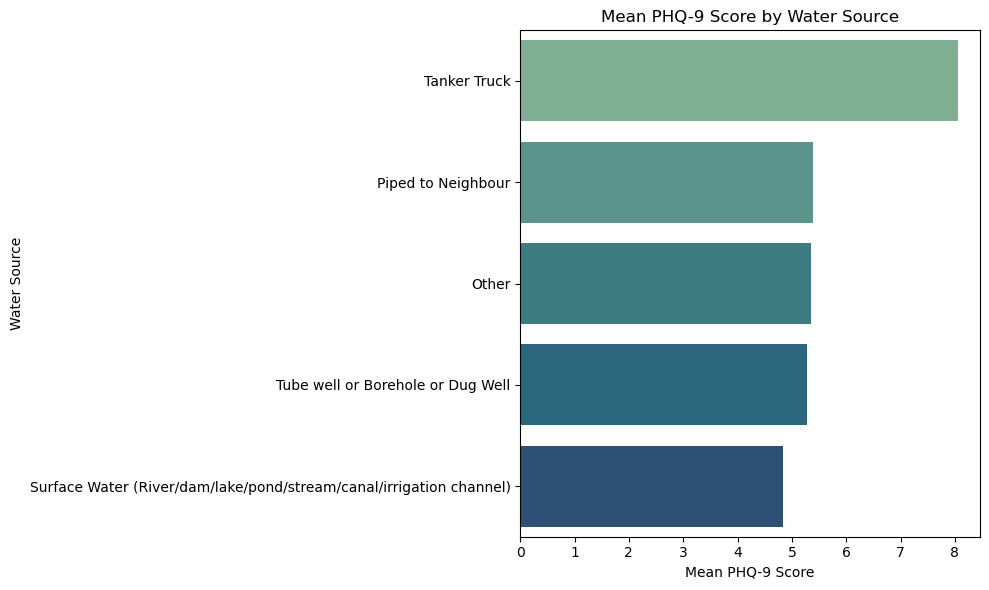

C:\Users\ashley.njoroge\AppData\Local\Temp\ipykernel_22440\193097761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_table, x='Mean PHQ-9 Score', y=label_col, palette='crest')


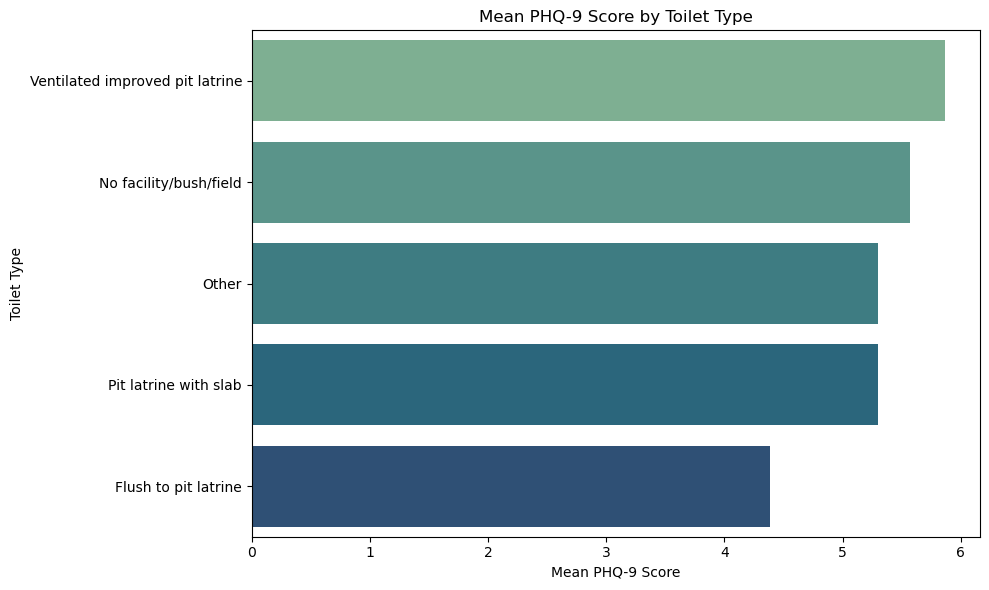

C:\Users\ashley.njoroge\AppData\Local\Temp\ipykernel_22440\193097761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_table, x='Mean PHQ-9 Score', y=label_col, palette='crest')


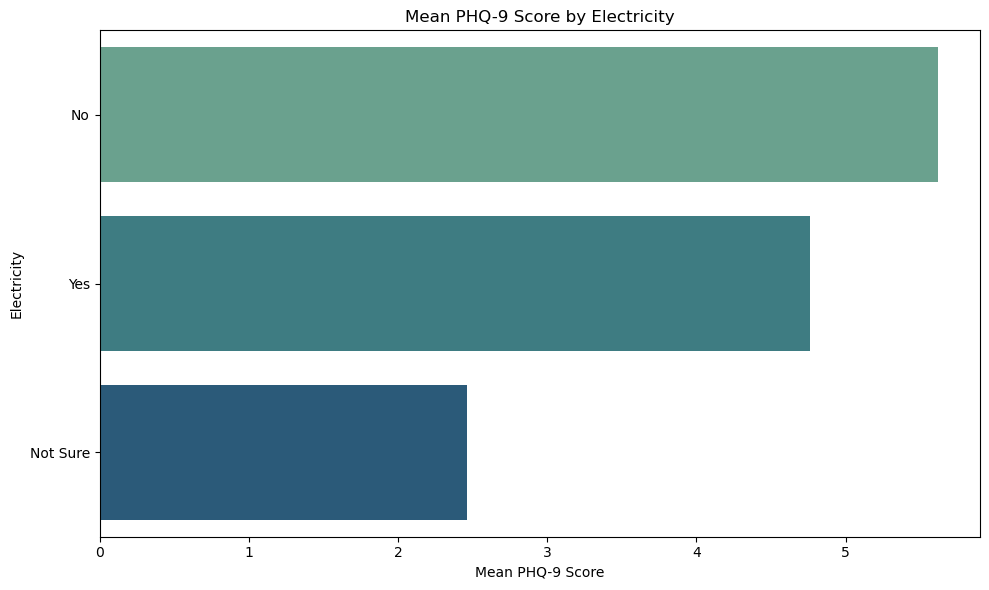

C:\Users\ashley.njoroge\AppData\Local\Temp\ipykernel_22440\193097761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_table, x='Mean PHQ-9 Score', y=label_col, palette='crest')


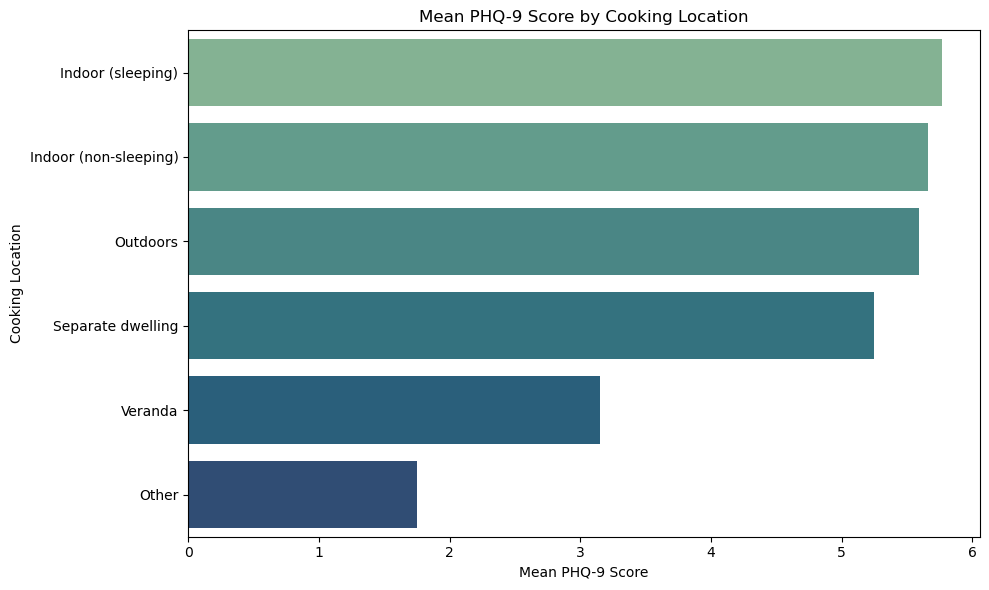

In [89]:
# Generic plot function for each table
def plot_from_summary_table(df_table, label_col):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_table, x='Mean PHQ-9 Score', y=label_col, palette='crest')
    plt.title(f"Mean PHQ-9 Score by {label_col}")
    plt.xlabel("Mean PHQ-9 Score")
    plt.ylabel(label_col)
    plt.tight_layout()
    plt.show()

# Plotting each
plot_from_summary_table(table_water, 'Water Source')
plot_from_summary_table(table_toilet, 'Toilet Type')
plot_from_summary_table(table_electricity, 'Electricity')
plot_from_summary_table(table_cooking, 'Cooking Location')


In [95]:
mean_scores = df.groupby('chu_name.x')['score'].mean().sort_values(ascending=False)
print("Mean PHQ-9 Score by CHU (Descending Order):\n", mean_scores.round(2))



Mean PHQ-9 Score by CHU (Descending Order):
 chu_name.x
Kombeni        9.44
Tsangatsini    6.74
Kibwabwani     6.49
Vishakani      5.93
Mnazimwenga    5.79
Viragoni       5.55
Kwale          5.46
Mutsengo       4.75
Buni           3.57
Mwele          1.38
Name: score, dtype: float64


In [98]:
electricity_chu_summary = df.groupby(['chu_name.x', 'electricity'])['score'].mean().reset_index()
electricity_chu_summary = electricity_chu_summary.pivot(index='chu_name.x', columns='electricity', values='score')

# Sorting CHUs by their overall mean PHQ-9 score (across electricity access types)
electricity_chu_summary['Mean'] = electricity_chu_summary.mean(axis=1)
electricity_chu_summary = electricity_chu_summary.sort_values(by='Mean', ascending=False)

print(electricity_chu_summary.round(2))


electricity     No  Not Sure   Yes  Mean
chu_name.x                              
Kombeni      10.16      3.00  7.82  6.99
Tsangatsini   6.73      7.00  7.03  6.92
Kibwabwani    6.38      4.25  7.39  6.01
Vishakani     5.95      6.00  5.91  5.95
Mnazimwenga   5.76      4.88  6.96  5.87
Kwale         5.98       NaN  4.92  5.45
Viragoni      5.67      1.67  4.93  4.09
Mutsengo      4.79      0.64  4.52  3.32
Buni          3.90       NaN  2.72  3.31
Mwele         1.32      0.00  1.44  0.92


CHUs like Kombeni, Tsangatsini, and Kibwabwani have the highest average PHQ-9 scores, particularly among individuals without electricity, suggesting that lack of electricity may be associated with higher mental distress